<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Building_an_AI_based_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error

In [37]:
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [38]:
df_super_store.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3593,3057,CA-2017-131492,19/10/2017,24/10/2017,Second Class,HH-15010,Hilary Holden,Corporate,United States,San Francisco,...,94110,West,OFF-EN-10002973,Office Supplies,Envelopes,Ampad #10 Peel & Seel Holiday Envelopes,8.960,2,0.0,4.3008
7333,9768,CA-2017-102659,12/09/2017,15/12/2017,Standard Class,LW-17215,Luke Weiss,Consumer,United States,Grand Rapids,...,49505,Central,OFF-BI-10000088,Office Supplies,Binders,GBC Imprintable Covers,54.900,5,0.0,26.901
2115,8765,CA-2015-107083,21/11/2015,27/11/2015,Standard Class,BB-11545,Brenda Bowman,Corporate,United States,Fort Worth,...,76106,Central,OFF-AR-10002257,Office Supplies,Art,"Eldon Spacemaker Box, Quick-Snap Lid, Clear",5.344,2,0.2,0.7348
1352,5661,CA-2016-145261,18/12/2016,21/12/2016,First Class,AH-10120,Adrian Hane,Home Office,United States,Salem,...,97301,West,TEC-PH-10004833,Technology,Phones,Macally Suction Cup Mount,28.680,3,0.2,-7.17
5897,2673,CA-2014-126403,09/09/2014,09/12/2014,Second Class,RR-19525,Rick Reed,Corporate,United States,Lowell,...,1852,East,OFF-PA-10004665,Office Supplies,Paper,Advantus Motivational Note Cards,26.200,2,0.0,12.838
1035,6227,CA-2015-133445,10/05/2015,10/09/2015,Standard Class,JF-15490,Jeremy Farry,Consumer,United States,NaN,...,97206,West,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,291.168,4,0.2,-14.5584
9890,1626,CA-2015-157084,19/12/2015,24/12/2015,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10002049,Technology,Accessories,Plantronics Savi W720 Multi-Device Wireless He...,1265.850,3,0.0,556.974
5143,4769,CA-2017-158883,06/02/2017,06/03/2017,Same Day,CS-11860,Cari Schnelling,Consumer,United States,Jacksonville,...,28540,South,OFF-PA-10004733,Office Supplies,Paper,Things To Do Today Spiral Book,25.344,4,0.2,9.1872
9447,7691,US-2017-128951,15/07/2017,17/07/2017,First Class,RS-19420,Ricardo Sperren,Corporate,United States,Suffolk,...,23434,South,FUR-TA-10004575,Furniture,Tables,Hon 5100 Series Wood Tables,872.940,3,0.0,157.1292
4371,7829,CA-2015-137302,26/04/2015,05/01/2015,Standard Class,BW-11110,Bart Watters,Corporate,United States,San Diego,...,92105,West,FUR-CH-10002017,Furniture,Chairs,SAFCO Optional Arm Kit for Workspace Cribbage ...,63.936,3,0.2,6.3936


**Summary**

The dataset appears to contain information related to orders, with various

1.   Attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   The data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   First impression the significant feature is `'Ship Mode', 'Segment', 'Quantity','Category' , 'Sub-Category', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit or understand what is the top products or categories most sales or or most profit.
the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics: Describe features of the data set by generating summaries about data samples.



In [39]:
# understand how many rows and columns
df_super_store.shape

(9994, 21)

In [40]:
# Get dataframe info to know the types and number of nulls in each column
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub-Category   9990 non-null   object 
 16  Product Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [41]:
# Get describtion to find the mean, min, max and standar deviation
# And to have first impression about the outliers
df_super_store.describe()
#df_super_store.describe(include='all')



,Row ID,Sales,Discount
count,9994.000000,9993.000000,9991.000000
mean,4997.500000,229.863780,0.156180
std,2885.163629,623.276019,0.206399
min,1.000000,0.444000,0.000000
25%,2499.250000,17.280000,0.000000
50%,4997.500000,54.480000,0.200000
75%,7495.750000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [42]:
# Get the null summary
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [43]:
# This method is used to show the histogram for a certain column
# the reason for take sample of 200 is that entire data
# make the graph unreadable so the sample
# for give an idea about the distribution of the data
def plot_histogram(df, column_name):
    # Copy the selected column to avoid modifying the original DataFrame
    # take sample of the data due to hug amount of data
    column_data = df[column_name].sample(200)

    # Convert the column to numeric
    column_data = pd.to_numeric(column_data, errors='coerce')

    # Create a larger figure by setting the figsize parameter
    plt.figure(figsize=(8, 6))

    # Create a histogram with auto-adjusted bins
    sns.histplot(column_data, kde=True, bins='auto')

    # Add labels and a title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column_name}')

    # Show the plot
    plt.show()

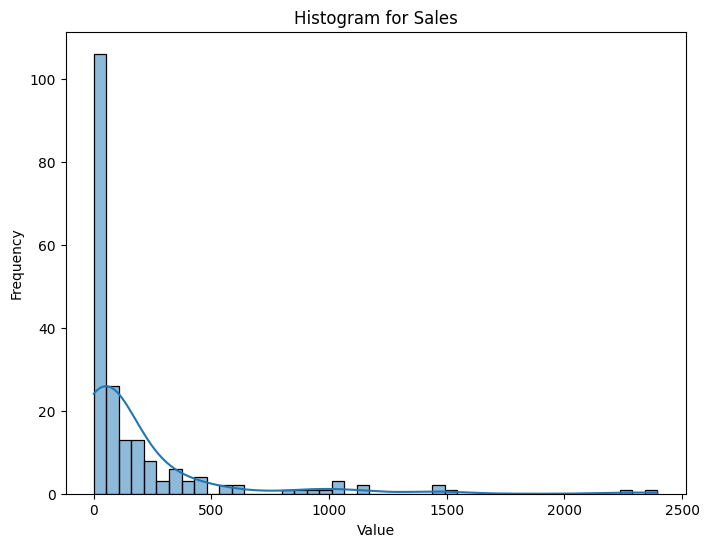

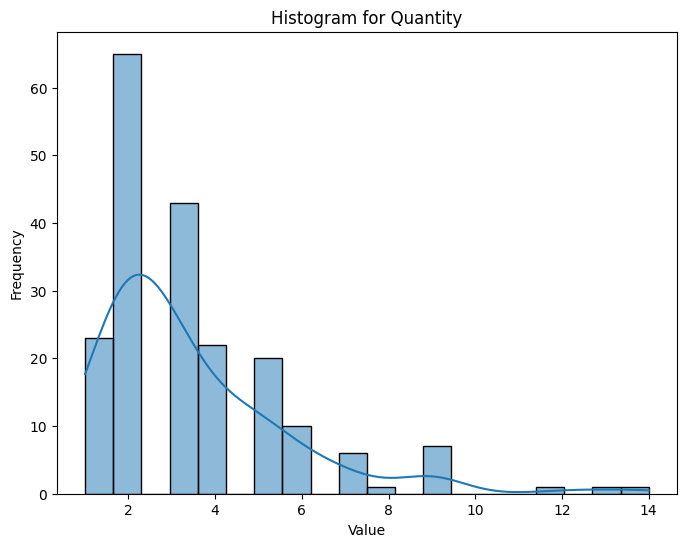

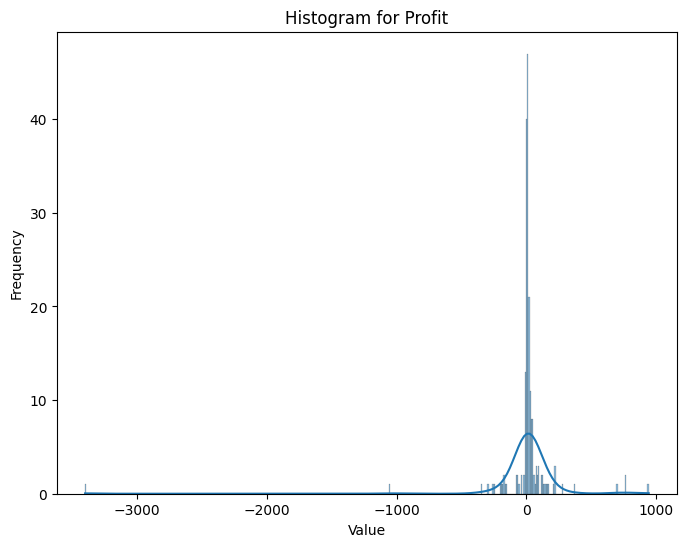

In [44]:
# print histogram for Sales
plot_histogram(df_super_store, 'Sales')

# print histogram for Quantity
plot_histogram(df_super_store, 'Quantity')

# print histogram for Profit
plot_histogram(df_super_store, 'Profit')

### 2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.


#### 2.5.1 discover the null

In [45]:
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [46]:
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected

In [47]:
df_super_store.dropna(inplace=True)

In [48]:
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [49]:
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.2 Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [50]:
del df_super_store['Row ID']

#### 2.5.3 discover the values that expected to be number like Quantity, Sales, Profit

##### 2.5.3.1 Convert Quantity to numberic

In [51]:
df_super_store['Quantity'].unique()


array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [52]:
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


#### 2.5.4 create method to check the values of a column in dataframe that not numberic

In [53]:
def check_non_numeric_values(dataframe, column_name):
    non_numeric_values = dataframe.loc[~dataframe[column_name].astype(str).str.match(r'^-?[0-9.]+$', na=False), column_name]
    return non_numeric_values


In [54]:
df_super_store['Quantity'].unique()


array([ 5,  4,  8,  2,  6,  7,  3,  9, 12, 10,  1, 14, 13, 11])

In [55]:
df_super_store['Profit'].unique()


array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [56]:
print(check_non_numeric_values(df_super_store, 'Profit'))

5    "-2639.9912"
Name: Profit, dtype: object


In [57]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


#### 2.5.5 Check the data types after conversion

In [58]:
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


#### 2.5.6 check the NA values and clean it

In [59]:
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.6 check the description after fix the some columns

In [60]:
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9939 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9939 non-null   object 
 1   Order Date     9939 non-null   object 
 2   Ship Date      9939 non-null   object 
 3   Ship Mode      9939 non-null   object 
 4   Customer ID    9939 non-null   object 
 5   Customer Name  9939 non-null   object 
 6   Segment        9939 non-null   object 
 7   Country        9939 non-null   object 
 8   City           9939 non-null   object 
 9   State          9939 non-null   object 
 10  Postal Code    9939 non-null   object 
 11  Region         9939 non-null   object 
 12  Product ID     9939 non-null   object 
 13  Category       9939 non-null   object 
 14  Sub-Category   9939 non-null   object 
 15  Product Name   9939 non-null   object 
 16  Sales          9939 non-null   float64
 17  Quantity       9939 non-null   int64  
 18  Discount

In [61]:
df_super_store.describe()

,Sales,Quantity,Discount,Profit
count,9939.000000,9939.000000,9939.000000,9939.000000
mean,226.011777,3.787101,0.154777,30.221163
std,580.428219,2.224326,0.205377,231.627602
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.140000,2.000000,0.000000,1.800550
50%,53.820000,3.000000,0.200000,8.713800
75%,208.072000,5.000000,0.200000,29.544000
max,17499.950000,14.000000,0.800000,8399.976000


### 2.4 Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.

In [62]:
# Group by Segment
#group by segement to understand the classes of the customer
#the important of the segment is to understand the customer classes

result = df_super_store.groupby('Segment')[['Sales', 'Profit','Quantity','Discount','Category','Sub-Category']].count()
print(result)


             Sales  Profit  Quantity  Discount  Category  Sub-Category
Segment                                                               
%                1       1         1         1         1             1
Consumer      5157    5157      5157      5157      5157          5157
Corporate     3009    3009      3009      3009      3009          3009
Home Office   1772    1772      1772      1772      1772          1772


In [63]:
# Segment with value '%' looks like it is corrupted data so I will remove it
# it represent only one row
df_super_store = df_super_store[df_super_store['Segment']!= '%']

In [64]:
# Discover sales per Category Values
df_super_store.groupby('Category')['Sales'].sum()

Category
Frnture              4323.3840
Furniture          723624.7352
Office Supplies    709413.3960
Technology         808569.9960
Name: Sales, dtype: float64

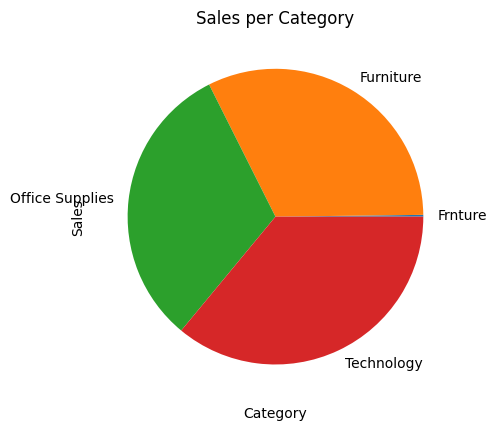

In [65]:
#Get a graph for sales per category

df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales per Category')
plt.show()


it looks like the Furniture and frniture are the same and there is misspelling in data so it need to fixed

In [66]:
# change Category value of Frnture to Furniture

df_super_store['Category'] = df_super_store['Category'].replace('Frnture', 'Furniture')


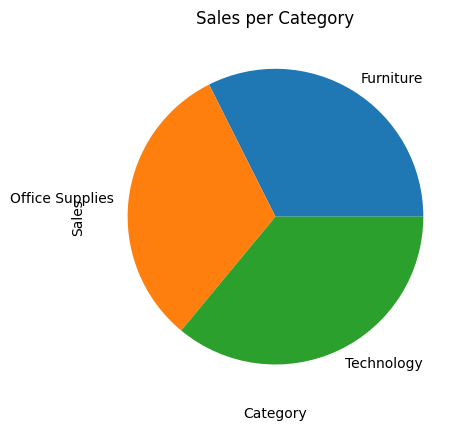

In [67]:
# check data after fix
df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales per Category')
plt.show()

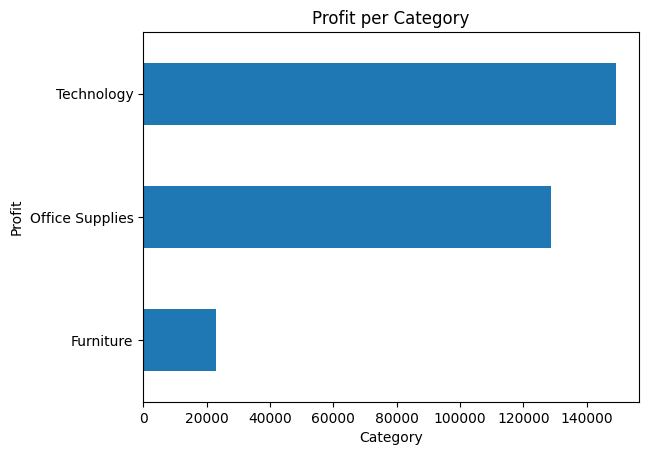

In [68]:
# profit by category
numberic_profit = df_super_store.copy()
numberic_profit['Profit'] = pd.to_numeric(df_super_store['Profit'], errors='coerce')

numberic_profit.groupby('Category')['Profit'].sum().plot(kind='barh')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit per Category')
plt.show()

`**The furniture is a lower category in terms of sales and also in terms of profit, so it may be a decision not to sell it in that category.**`

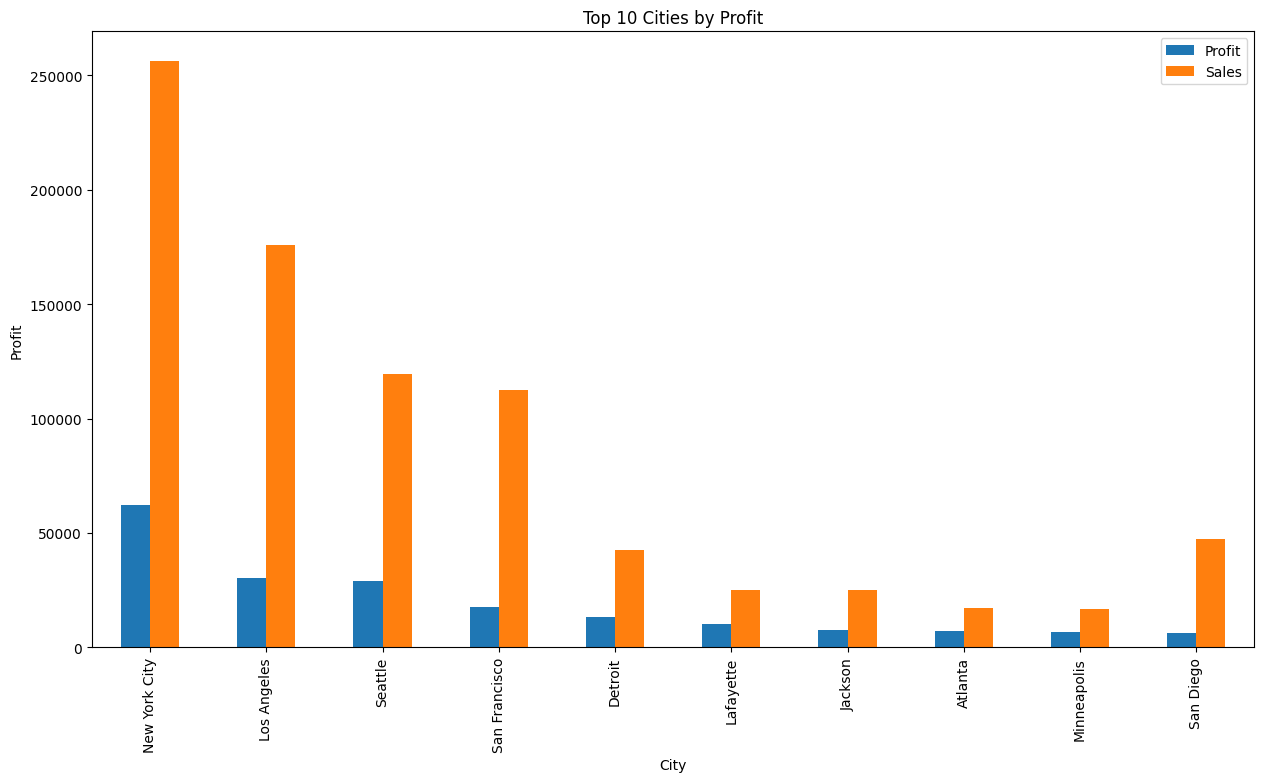

In [69]:
# get some insights about the top 10 cities in sales and profit
profit_by_city = numberic_profit.groupby('City')[['Profit', 'Sales']].sum()

# Sort the results by Profit in descending order
profit_by_city_sorted = profit_by_city.sort_values(by='Profit', ascending=False)

# Select the top 10 cities
top_10_cities = profit_by_city_sorted.head(10)

# Plot the bar chart
ax = top_10_cities.plot(kind='bar', figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Top 10 Cities by Profit')


plt.show()

In [70]:
# group by Country
result = df_super_store.groupby('Country')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

               Sales  Profit  Quantity  Discount
Country                                         
56                 1       1         1         1
US                 1       1         1         1
United States   9936    9936      9936      9936


In [71]:
#it looks like the country column has not benifit and could be delete
# us is the same united states and maybe 56 is wrong and it was required to be USA
del df_super_store['Country']

because all of sales inside USA then try to group by city and also segment to understand the customer discrimination

In [72]:
result = df_super_store.groupby('City')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

             Sales  Profit  Quantity  Discount
City                                          
Aberdeen         1       1         1         1
Abilene          1       1         1         1
Akron           20      20        20        20
Albuquerque     14      14        14        14
Alexandria      16      16        16        16
...            ...     ...       ...       ...
Woonsocket       4       4         4         4
Yonkers         15      15        15        15
York             5       5         5         5
Yucaipa          1       1         1         1
Yuma             4       4         4         4

[531 rows x 4 columns]


In [73]:
result = df_super_store.groupby(['City', 'Segment'])[['Sales', 'Profit', 'Quantity','Discount']].sum()

# Display the grouped result
print(result)

                         Sales    Profit  Quantity  Discount
City     Segment                                            
Aberdeen Consumer       25.500    6.6300         3       0.0
Abilene  Consumer        1.392   -3.7584         2       0.8
Akron    Consumer      664.164  -95.6766        38       4.6
         Corporate    1821.872  -37.3386        16       1.8
         Home Office    22.926    1.6356         9       0.9
...                        ...       ...       ...       ...
Yonkers  Home Office   216.400   94.6252         8       0.0
York     Corporate     817.978 -102.1692        19       2.1
Yucaipa  Corporate      50.800   13.2080         5       0.0
Yuma     Corporate     196.024   49.8819        11       0.4
         Home Office   644.841 -515.8728        11       1.4

[1026 rows x 4 columns]


In [74]:
#group by Region
result = df_super_store.groupby(['Region'])[['Sales', 'Profit', 'Quantity','Discount']].sum()
print(result)


               Sales       Profit  Quantity  Discount
Region                                               
Central  491691.0252   45347.5955      8660    544.38
Centrl     1137.5380   -1251.6690        12      1.90
Cntral     1161.8330    -471.8704        17      2.10
East     663689.6090  102556.4598     10511    403.20
Est        5854.8040   -7988.5589        34      4.20
South    356069.9155   55374.0360      6164    234.40
Southh     3970.4700   -1976.5331         8      1.20
West     722356.3165  109338.0327     12230    346.25


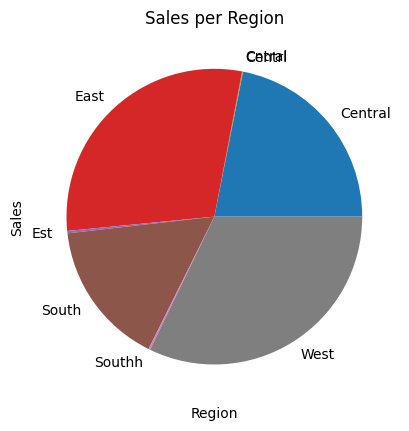

In [75]:
df_super_store.groupby('Region')['Sales'].sum().plot(kind='pie')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales per Region')
plt.show()

In [76]:
# Get count for each of product name

df_super_store.groupby('Product Name')[['Sales', 'Profit', 'Quantity','Discount']].count()


,Sales,Profit,Quantity,Discount
Product Name,,,,
"""While you Were Out"" Message Book, One Form per Page",3,3,3,3
"#10 Gummed Flap White Envelopes, 100/Box",4,4,4,4
#10 Self-Seal White Envelopes,4,4,4,4
"#10 White Business Envelopes,4 1/8 x 9 1/2",7,7,7,7
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,10,10,10
...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",5,5,5,5
iOttie HLCRIO102 Car Mount,5,5,5,5
iOttie XL Car Mount,2,2,2,2


**This can lead having 5~10 big cities in terms of numbers like New Youk, LA, Philadelphia, San Francisco**

In [77]:
# Discover Segment Values
df_super_store.groupby('Segment')[['Sales', 'Profit', 'Quantity','Discount']].count()

,Sales,Profit,Quantity,Discount
Segment,,,,
Consumer,5157,5157,5157,5157
Corporate,3009,3009,3009,3009
Home Office,1772,1772,1772,1772


In [78]:
!pip install plotly


In [79]:
import plotly.express as px

# get some insights for category and segment

result = df_super_store.groupby(['City', 'Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['City', 'Segment'], values='Count', title='Count by City and Segment')
fig.show()


from the data I noticed that there is record with value not correct and it is only one record so I will remove it
the row as following

Segment = '%' looks like not correct values so I will remove it

In [80]:
# get some insights for category and segment
result = df_super_store.groupby(['Category','Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['Category', 'Segment'], values='Count', title='Count by Category and Segment')
fig.show()

In [81]:
# get some insights for category and segment
result = df_super_store.groupby(['Segment','Product Name']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['Segment','Product Name'], values='Count', title='Count by Category and Segment')
fig.show()

In [82]:
# Discover Sub-Category Values
df_super_store.groupby(['Category','Sub-Category']).sum()

<ipython-input-82-df068bc424b8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     112386.1677       851     47.03  -2872.6610
                Chairs        326901.1600      2343    104.10  26709.6704
                Furnishings    91600.9720      3554    131.20  13172.9484
                Tables        197059.8195      1193     78.80 -13933.3068
Office Supplies Appliances    107403.6850      1716     75.20  18475.8830
                Art            27118.7920      3000     59.60   6527.7870
                Binders       197411.7690      5922    559.40  35770.1427
                Envelopes      16473.1380       904     20.20   6963.0751
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12411.1320      1394     25.00   5510.9194
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       220603.2320      3125     61.80  21708.6570
                Supplies       46488.1620       645     14.40  -1154.3415
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      166020.6200       427     33.30   6007.1787
                Phones        325641.0280      3260    135.40  45483.9921

In [83]:
n_by_category_subcategory = df_super_store.groupby(['Category', 'Sub-Category'])['Profit'].sum()
print (n_by_category_subcategory)


Category         Sub-Category
Furniture        Bookcases       -2872.6610
                 Chairs          26709.6704
                 Furnishings     13172.9484
                 Tables         -13933.3068
Office Supplies  Appliances      18475.8830
                 Art              6527.7870
                 Binders         35770.1427
                 Envelopes        6963.0751
                 Fasteners         949.5182
                 Labels           5510.9194
                 Paper           34053.5693
                 Storage         21708.6570
                 Supplies        -1154.3415
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         6007.1787
                 Phones          45483.9921
Name: Profit, dtype: float64


In [84]:
#group by ship mode with respect to profit and sales

df_super_store.groupby('Ship Mode')[['Sales', 'Profit', 'Quantity','Discount']].sum()

,Sales,Profit,Quantity,Discount
Ship Mode,,,,
First Class,3.489612e+05,50411.2283,5665,249.67
Same Day,1.282171e+05,15904.5374,1959,82.55
Second Class,4.516190e+05,60668.5704,7380,266.43
Standard Class,1.317134e+06,173943.1565,22632,938.98


    the standart class is the most sales and profit

### 2.2 Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.

In [85]:
#The interquartile range (IQR) method with a multiplier of 1.5 is used to identify
#potential outliers by defining a range between the first quartile (Q1)
# minus 1.5 times the IQR and the third quartile (Q3) plus 1.5 times the IQR.
#Data points outside this range are considered outliers and may be addressed
#in outlier handling procedures.
#The choice of 1.5 as a multiplier in the interquartile range (IQR) method
#is a commonly used rule of thumb in statistics for identifying potential outliers.
#This value is based on the assumption that the distribution of
#the data is approximately normal (or close to normal).
def clean_outliers_inplace(df, column_name):
    # Display the original number of rows
    original_rows = len(df)
    print(f"Number of rows before outlier removal: {original_rows}")

    # Create a boxplot to visualize the data
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot of the Original Dataset")
    plt.show()

    # Identify and treat outliers using the boxplot
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Remove outliers in the original DataFrame
    df.drop(outliers.index, inplace=True)

    # Reset the index of the original DataFrame
    df.reset_index(drop=True, inplace=True)

    # Display the number of rows after outlier removal
    cleaned_rows = len(df)
    print(f"Number of rows after outlier removal: {cleaned_rows}")

    # Calculate and display the percentage of removal
    percentage_removed = ((original_rows - cleaned_rows) / original_rows) * 100
    print(f"Percentage of removal: {percentage_removed:.2f}%")

    # Create a boxplot of the dataset after outlier treatment
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot After Outlier Treatment")
    plt.show()


Number of rows before outlier removal: 9938


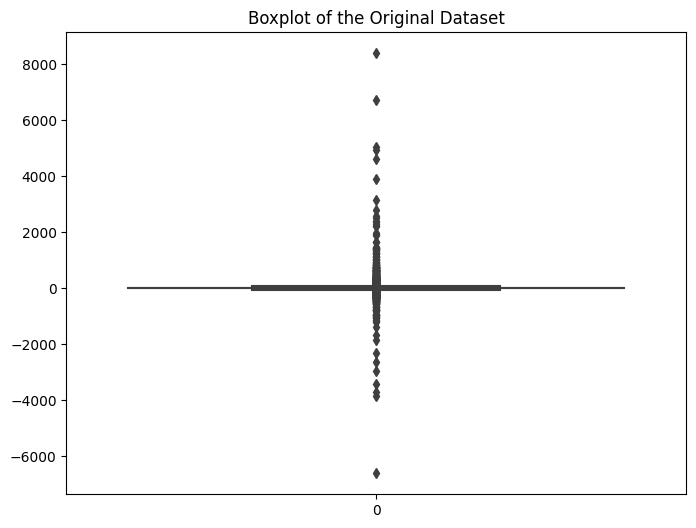

Number of rows after outlier removal: 8099
Percentage of removal: 18.50%


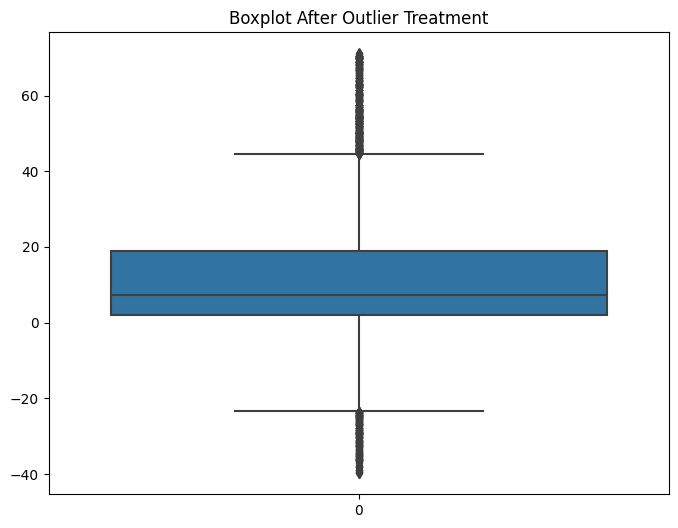

In [86]:
clean_outliers_inplace(df_super_store, 'Profit')

Number of rows before outlier removal: 8099


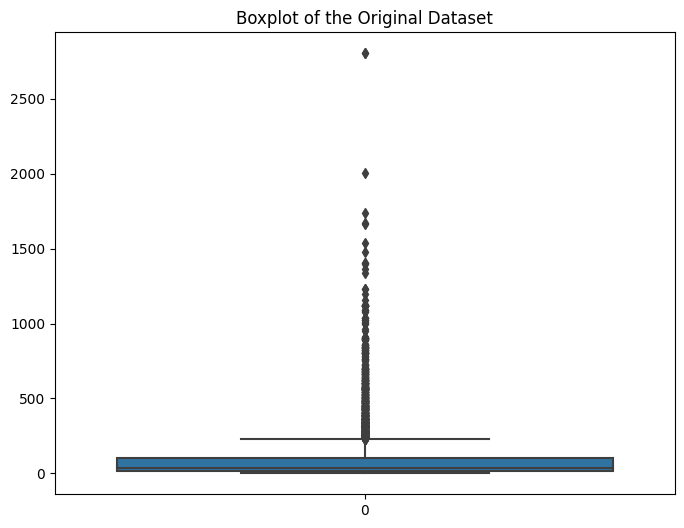

Number of rows after outlier removal: 7282
Percentage of removal: 10.09%


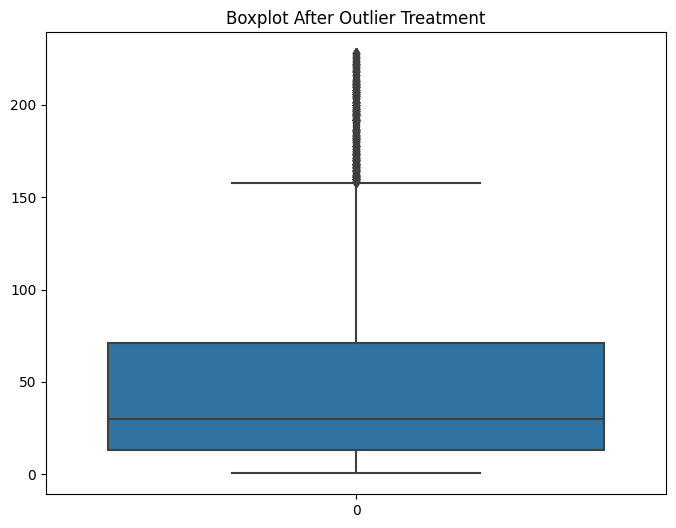

In [87]:
clean_outliers_inplace(df_super_store, 'Sales')


Number of rows before outlier removal: 7282


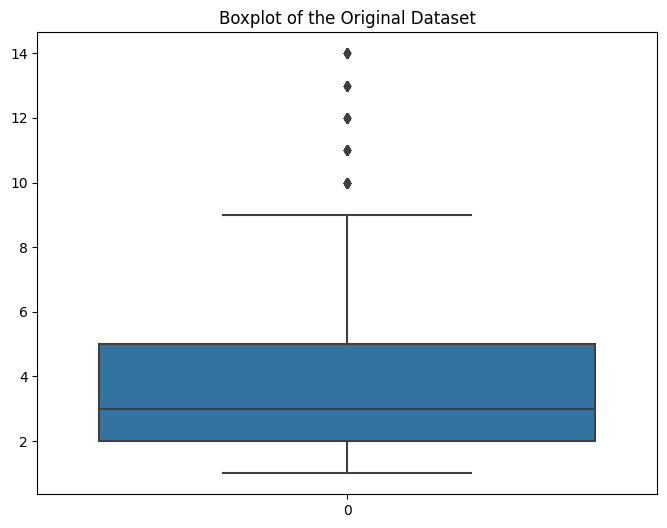

Number of rows after outlier removal: 7201
Percentage of removal: 1.11%


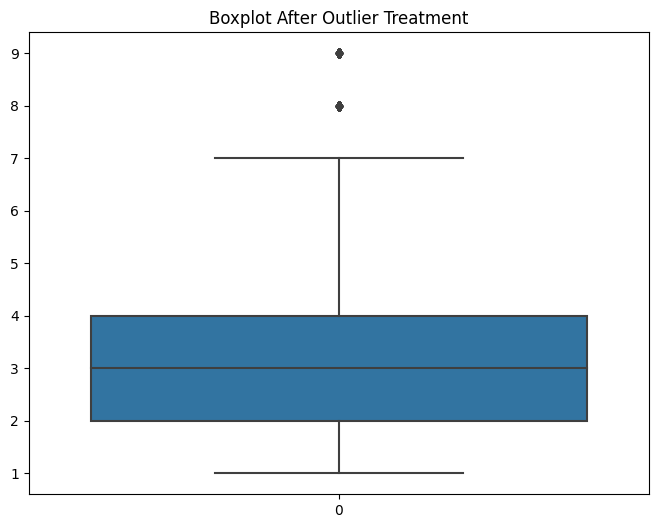

In [88]:
clean_outliers_inplace(df_super_store, 'Quantity')

Number of rows before outlier removal: 7201


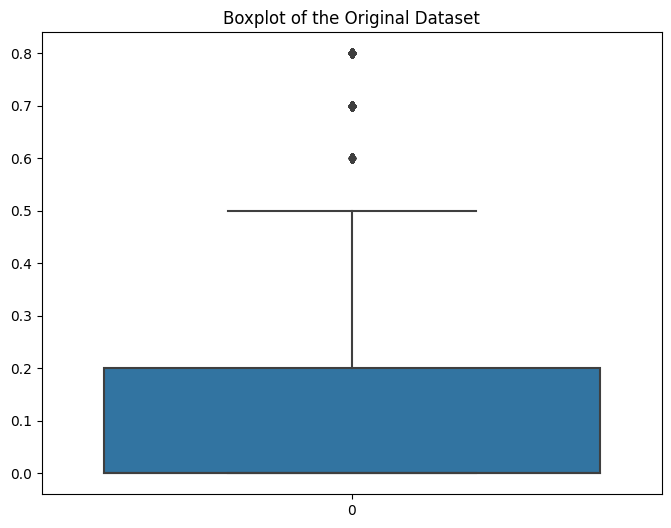

Number of rows after outlier removal: 6563
Percentage of removal: 8.86%


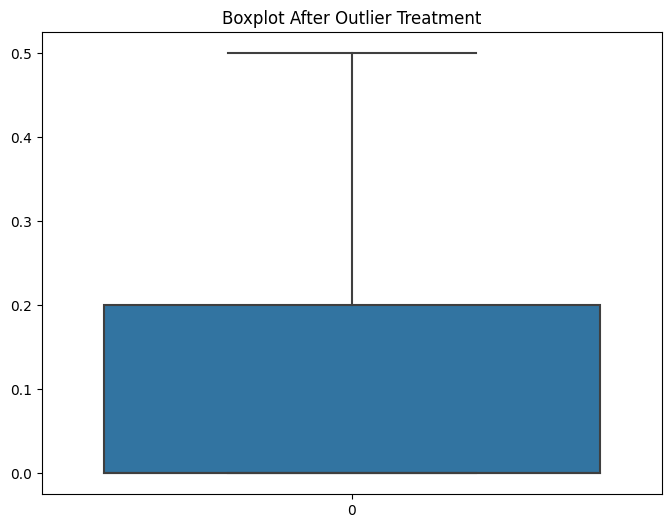

In [89]:
clean_outliers_inplace(df_super_store, 'Discount')

### 2.3 Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.

In [90]:

# Select only numeric columns for scaling
numeric_cols = df_super_store.select_dtypes(include=['number']).columns
df_numeric = df_super_store[numeric_cols]

# Normalising and scaling using Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalising and scaling using  Z-score Standardization
scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

print(df_minmax)
print(df_standard)


         Sales  Quantity  Discount    Profit
0     0.935917     0.500       0.6  0.000000
1     0.721393     0.375       0.4  0.004641
2     0.851418     0.125       0.6  0.007131
3     0.837448     0.250       0.6  0.012878
4     0.622030     0.000       0.8  0.015602
...        ...       ...       ...       ...
6558  0.699647     0.375       0.0  0.996285
6559  0.642639     0.750       0.0  0.997923
6560  0.717974     0.375       0.0  0.998014
6561  0.671275     1.000       0.0  0.998402
6562  0.861110     0.500       0.0  1.000000

[6563 rows x 4 columns]
         Sales  Quantity  Discount    Profit
0     3.019172  0.857663  1.965199 -3.289243
1     2.098023  0.327241  1.017480 -3.256694
2     2.656342 -0.733604  1.965199 -3.239231
3     2.596356 -0.203182  1.965199 -3.198928
4     1.671367 -1.264026  2.912918 -3.179825
...        ...       ...       ...       ...
6558  2.004648  0.327241 -0.877958  3.697865
6559  1.759861  1.918508 -0.877958  3.709355
6560  2.083343  0.327241 -0.87

###2.6 Correlation: Describe features that are related and the nature of that relationship.

In [91]:
df_super_store.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1656,CA-2015-127824,18/10/2015,22/10/2015,Standard Class,JC-15775,John Castell,Consumer,Seattle,Washington,98115,West,FUR-FU-10002505,Furniture,Furnishings,Eldon 100 Class Desk Accessories,10.110,3,0.0,3.2352
3944,CA-2014-164721,25/11/2014,27/11/2014,Second Class,LW-16825,Laurel Workman,Corporate,Brentwood,California,94513,West,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,23.880,3,0.0,10.5072
3162,US-2017-141698,15/04/2017,21/04/2017,Standard Class,SD-20485,Shirley Daniels,Home Office,Houston,Texas,77041,Central,OFF-PA-10001826,Office Supplies,Paper,Xerox 207,20.736,4,0.2,7.2576
1610,CA-2017-118577,10/06/2017,10/11/2017,Standard Class,XP-21865,Xylona Preis,Consumer,Belleville,New Jersey,7109,East,OFF-PA-10004888,Office Supplies,Paper,Xerox 217,6.480,1,0.0,3.1104
1793,CA-2017-100615,20/04/2017,24/04/2017,Standard Class,SJ-20215,Sarah Jordon,Consumer,Chicago,Illinois,60653,Central,OFF-AR-10001683,Office Supplies,Art,Lumber Crayons,15.760,2,0.2,3.5460


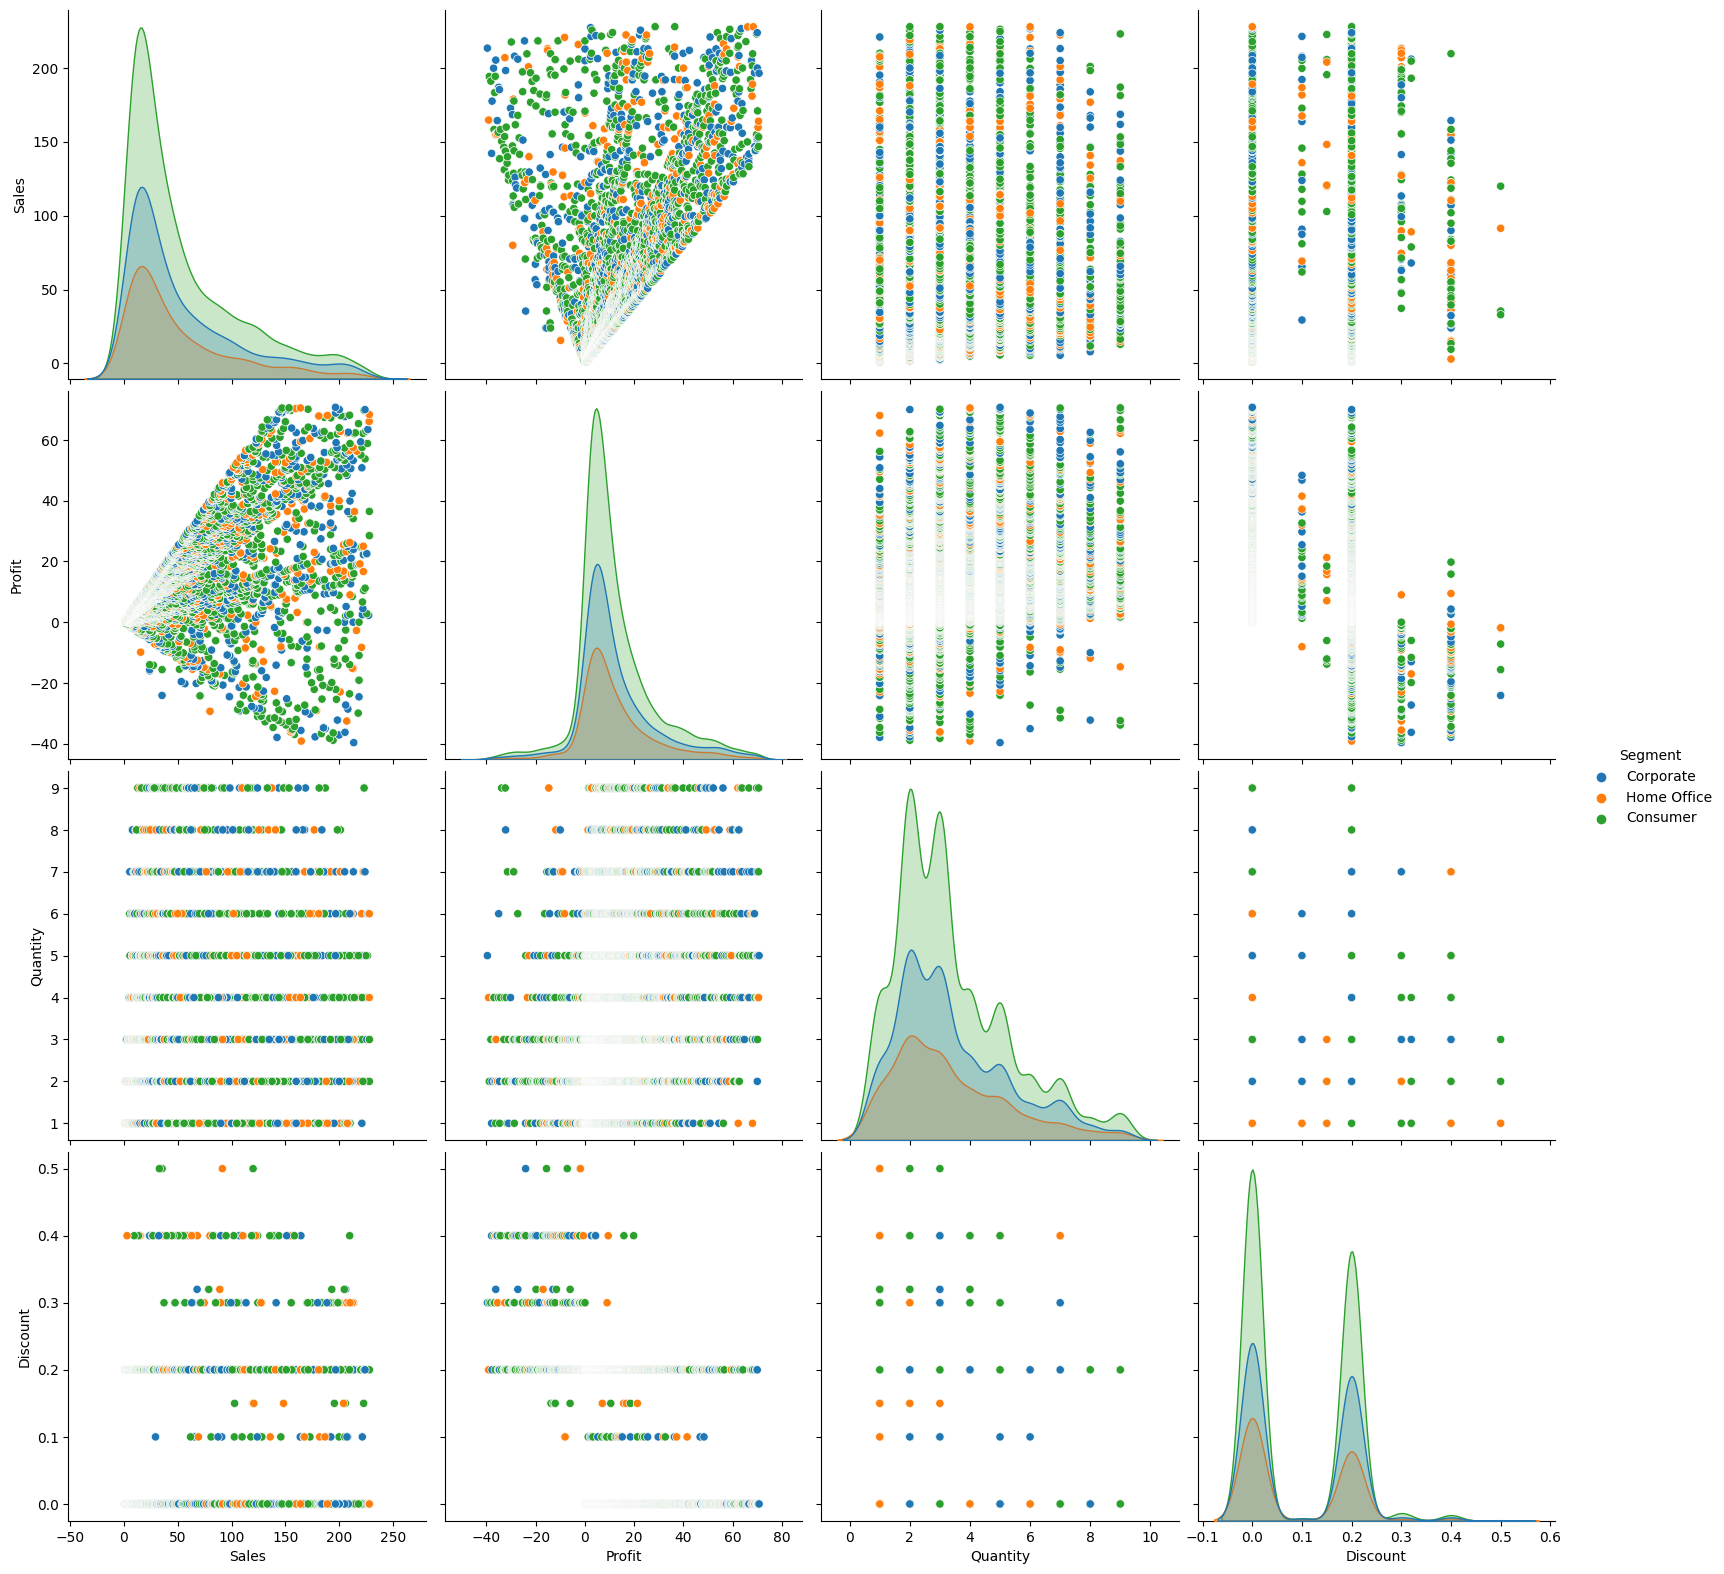

In [92]:
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit','Quantity' ,'Discount'])

In [93]:
correlation_matrix = df_super_store.corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.158482  0.058304  0.504022
Quantity  0.158482  1.000000 -0.034379  0.259287
Discount  0.058304 -0.034379  1.000000 -0.344402
Profit    0.504022  0.259287 -0.344402  1.000000


<ipython-input-93-aa93160ee947>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

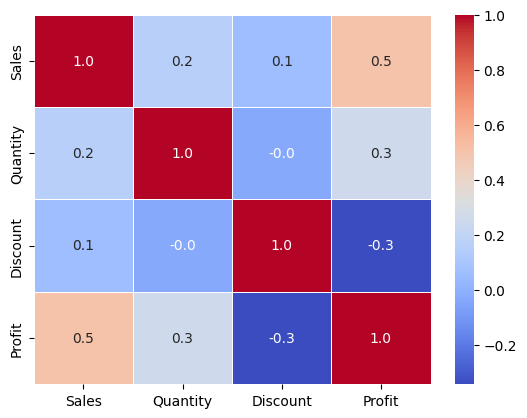

In [94]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)


*there is medium correlation between sales and profit 0.6*

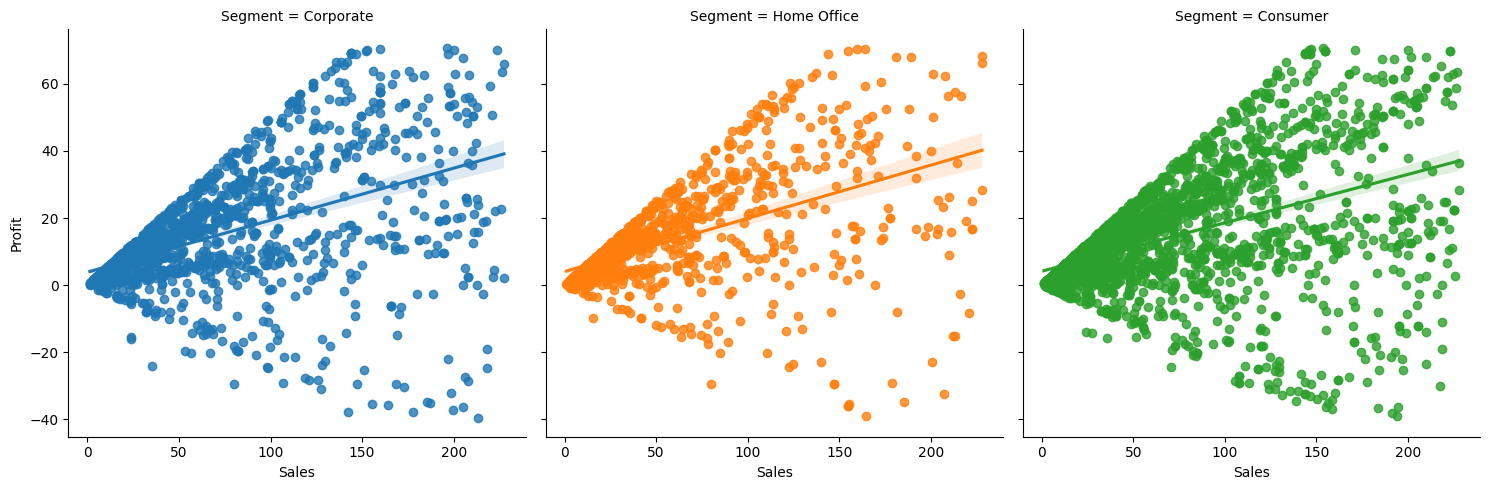

In [95]:
sns.lmplot(data=df_super_store, hue='Segment', x='Sales', y='Profit', col='Segment', fit_reg=True, col_wrap=3)
plt.show()

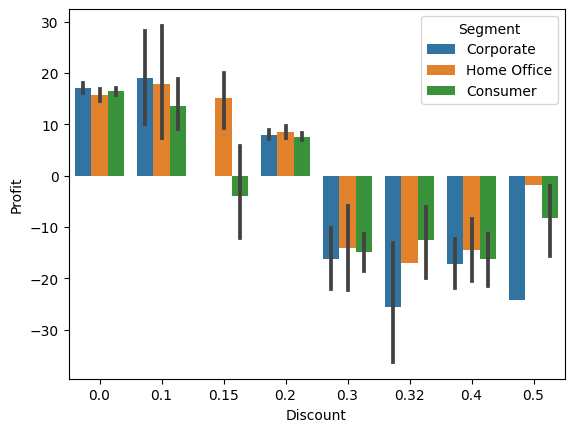

In [96]:
# check also the relation between the discount and profit
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Discount', y='Profit')
plt.show()

It look like there are some outliter let's study them by boxplot

array([[<Axes: title={'center': 'Discount'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Profit'}, xlabel='[Segment]'>],
       [<Axes: title={'center': 'Quantity'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Sales'}, xlabel='[Segment]'>]],
      dtype=object)

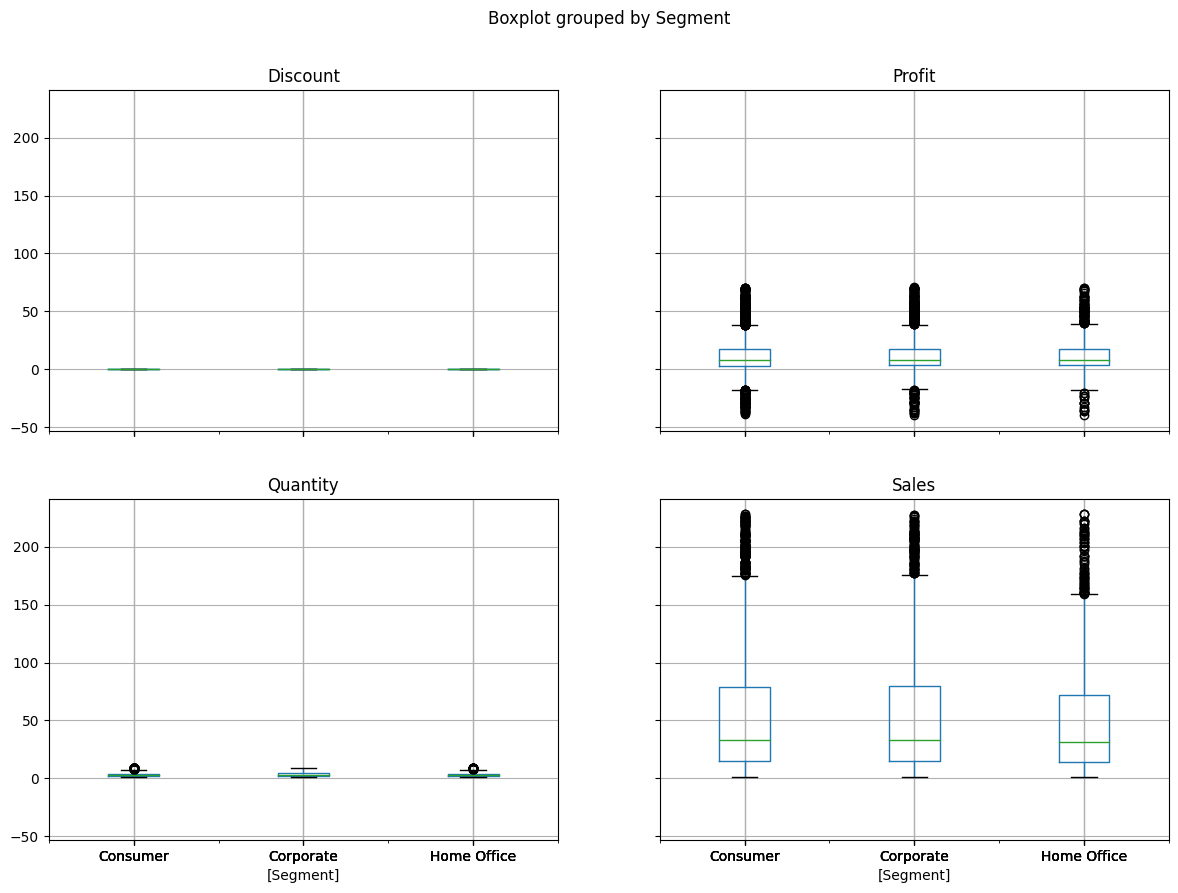

In [97]:
df_super_store.boxplot(by='Segment', figsize=(14,10))

# Task 3:
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using all of the following:

#### the following method is used to create either **LogisticRegression** model or linear **LinearRegression**  and also print the accuracy of that model and return model to use it in prediction

In [98]:
def train_and_evaluate_model(X, y, use_logistic_regression=True):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (optional, but can be beneficial for some algorithms)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model based on the parameter
    if use_logistic_regression:
        model = LogisticRegression()
    else:
        model = LinearRegression()

    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    if use_logistic_regression:
        accuracy = accuracy_score(y_test, predictions)
        classification_report_result = classification_report(y_test, predictions)

        print(f'Logistic Regression - Accuracy: {accuracy}')
        print('Classification Report:')
        print(classification_report_result)
    else:
        # Mean Squared Error (MSE) is a common metric for regression models.
        # Assuming y_test and predictions are your true labels and predicted labels, respectively
        mse = mean_squared_error(y_test, predictions)
        print(f'Linear Regression - Mean Squared Error: {mse}')

    return model

### 3.1 Two categorical variables

I want to find our date if there is relation between :
* Segment (dependent)

And (independent):
* Category
* Sub-Category
* Product Name
* Ship Mode

In [102]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
columns_to_encode = ['Category', 'Region', 'Ship Mode']

# Create a new DataFrame for label-encoded columns
df_encoded = df_super_store.copy()

# Instantiate a LabelEncoder
label_encoder = LabelEncoder()

# Iterate through specified columns and label encode
for column in columns_to_encode:
    df_encoded[column] = label_encoder.fit_transform(df_super_store[column])

df_super_store_independent = df_encoded[columns_to_encode]
df_super_store_dependent = df_super_store[['Segment']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e


In [103]:
model = train_and_evaluate_model(X, y, use_logistic_regression=True)

Logistic Regression - Accuracy: 0.5171363290175172
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.52      1.00      0.68       679
   Corporate       0.00      0.00      0.00       376
 Home Office       0.00      0.00      0.00       258

    accuracy                           0.52      1313
   macro avg       0.17      0.33      0.23      1313
weighted avg       0.27      0.52      0.35      1313



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [104]:
df_super_store.tail(2)[['Segment','Category', 'Region', 'Ship Mode']]

,Segment,Category,Region,Ship Mode
6561,Consumer,Office Supplies,East,Standard Class
6562,Corporate,Furniture,West,First Class


In [107]:
# Get sample of data and encode it then try to predict by the model

df_sample = df_super_store.tail(5)[['Segment','Category', 'Region', 'Ship Mode']]

for column in columns_to_encode:
    df_sample[column] = label_encoder.fit_transform(df_sample[column])

print(df_sample)


          Segment  Category  Region  Ship Mode
6558  Home Office         2       0          2
6559     Consumer         1       0          2
6560  Home Office         2       1          1
6561     Consumer         1       1          2
6562    Corporate         0       2          0


In [109]:
model.predict([[1 ,	1 ,	2]])

array(['Consumer'], dtype=object)

### 3.2 Numerical vs numerical
    I want to find our date if there is relation between :
    * profit (dependent)

    And (independent):
    * Quantity
    * Sales

In [ ]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Profit']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [ ]:
model= train_and_evaluate_model(X, y, use_logistic_regression=False)
model.fit(X,y)

Linear Regression - Mean Squared Error: 157.86310209144204


LinearRegression()

In [ ]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Profit']]

,Sales,Quantity,Discount,Profit
6561,153.36,9,0.0,70.5456
6562,196.45,5,0.0,70.7220


In [ ]:
model.predict([[447.944 ,	7 ,	0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[69.82495223]])

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

### 3.3 Categorical vs numerical
    I want to find our date if there is relation between :
    * Segment (dependent)

    And (independent):
    * Quantity
    * Sales
    * Discount




In [ ]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Segment']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [ ]:
# Train and evaluate logistic regression
model= train_and_evaluate_model(X, y, use_logistic_regression=True)


Logistic Regression - Accuracy: 0.5171363290175172
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.52      1.00      0.68       679
   Corporate       0.00      0.00      0.00       376
 Home Office       0.00      0.00      0.00       258

    accuracy                           0.52      1313
   macro avg       0.17      0.33      0.23      1313
weighted avg       0.27      0.52      0.35      1313



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [ ]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Segment']]

,Sales,Quantity,Discount,Segment
6561,153.36,9,0.0,Consumer
6562,196.45,5,0.0,Corporate


In [ ]:
model.predict([[1056.86 ,	3 ,	0]])

array(['Consumer'], dtype=object)